In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = {
    'Year': [2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020],
    'Population': [1050000, 1070000, 1100000, 1130000, 1150000, 1180000, 1210000, 1230000, 1250000, 1280000, 1300000]
}
df = pd.DataFrame(data)

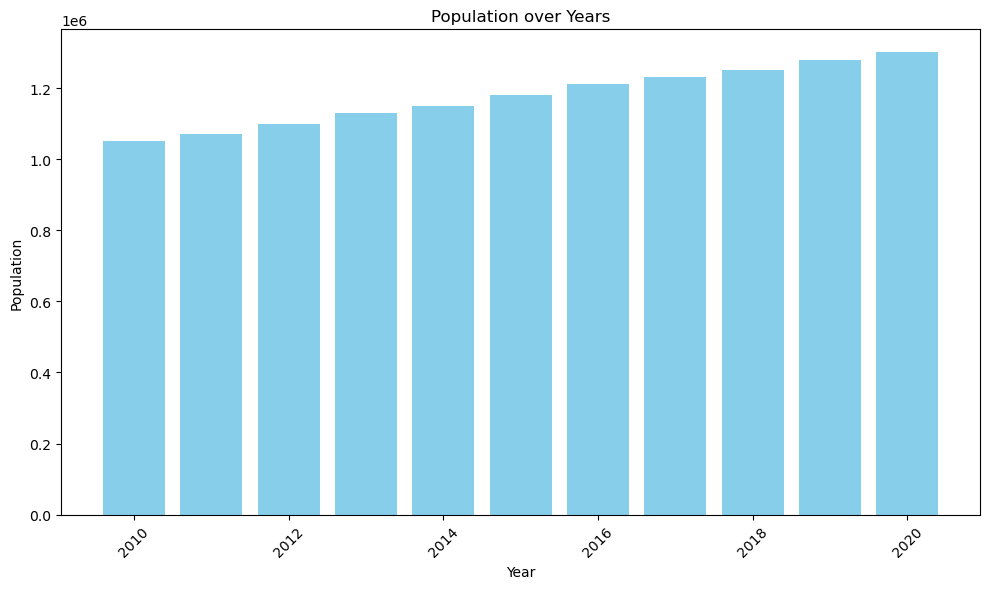

In [3]:
plt.figure(figsize=(10, 6))
plt.bar(df['Year'], df['Population'], color='skyblue')
plt.xlabel('Year')
plt.ylabel('Population')
plt.title('Population over Years')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [4]:
import pandas as pd

# Load the dataset
df = pd.read_csv('titanic_train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
# Check for missing values
df.isnull().sum()

# Fill missing values for 'Age' with the median age
df['Age'].fillna(df['Age'].median(), inplace=True)

# Fill missing values for 'Embarked' with the mode (most common value)
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

# Drop the 'Cabin' column as it has too many missing values
df.drop(columns=['Cabin'], inplace=True)

# Drop rows with missing values in 'Fare'
df.dropna(subset=['Fare'], inplace=True)

# Check the data types
df.dtypes

# Convert 'Sex' to numerical values
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})

# Convert 'Embarked' to numerical values
df['Embarked'] = df['Embarked'].map({'S': 0, 'C': 1, 'Q': 2})


In [6]:
# Summary statistics
df.describe()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,0.352413,29.361582,0.523008,0.381594,32.204208,0.361392
std,257.353842,0.486592,0.836071,0.477990,13.019697,1.102743,0.806057,49.693429,0.635673
min,1.000000,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,0.000000,22.000000,0.000000,0.000000,7.910400,0.000000
50%,446.000000,0.000000,3.000000,0.000000,28.000000,0.000000,0.000000,14.454200,0.000000
75%,668.500000,1.000000,3.000000,1.000000,35.000000,1.000000,0.000000,31.000000,1.000000
max,891.000000,1.000000,3.000000,1.000000,80.000000,8.000000,6.000000,512.329200,2.000000


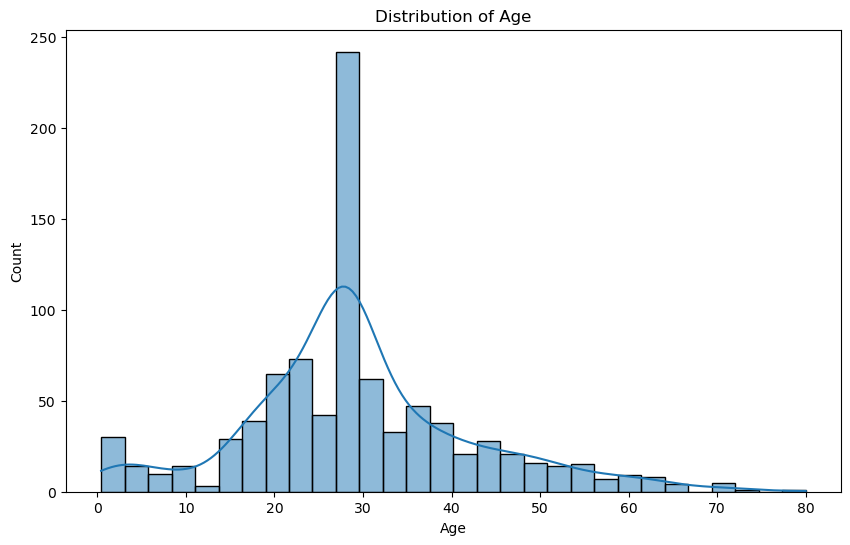

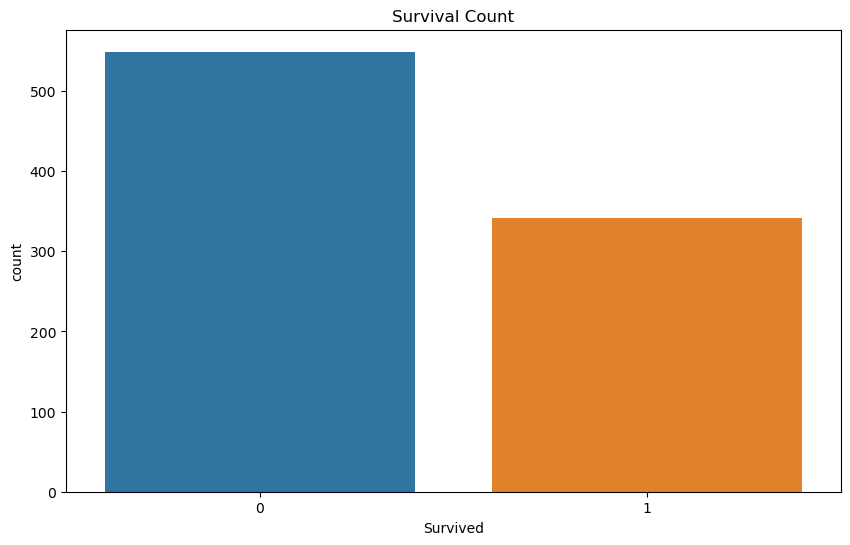

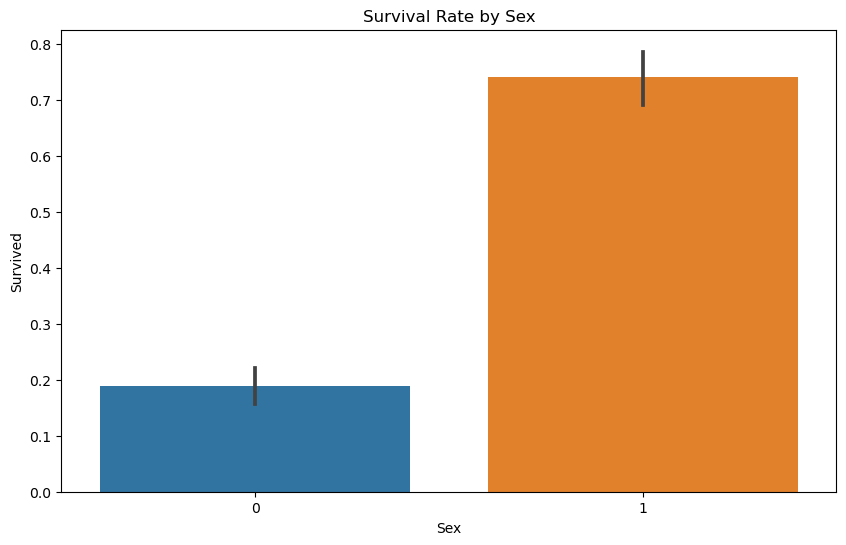

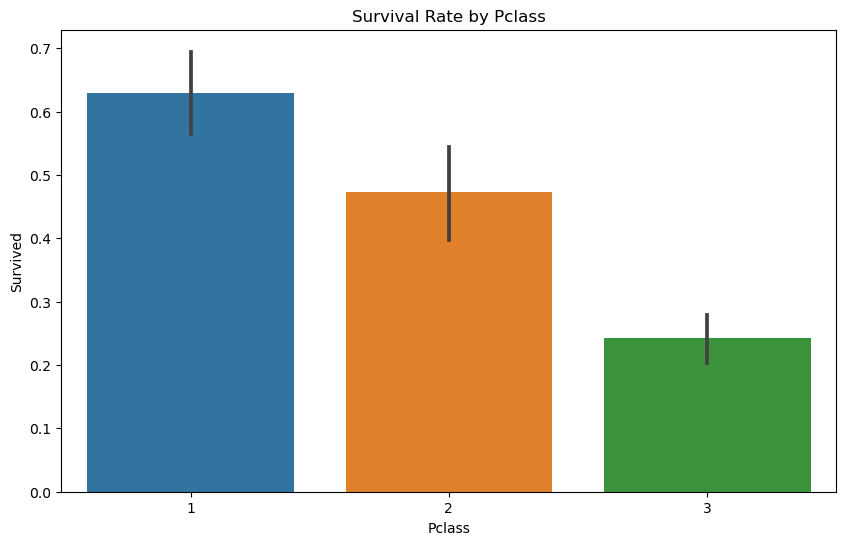

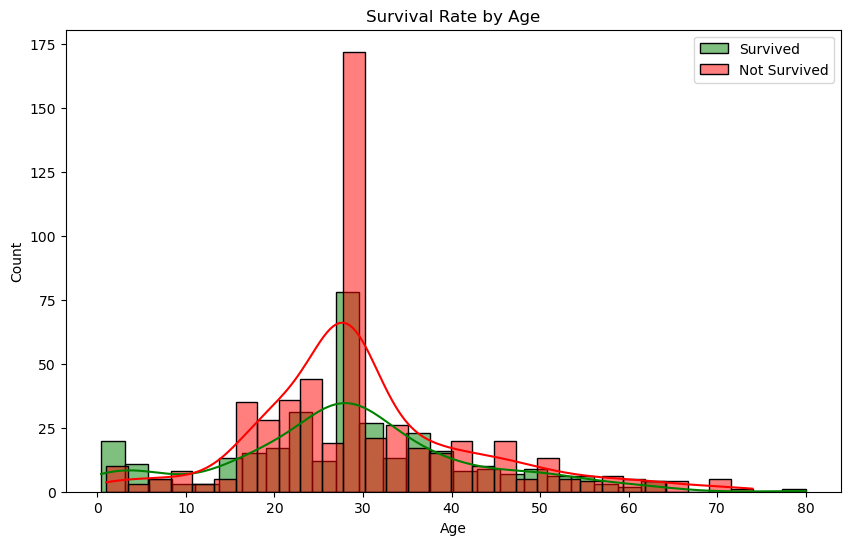

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Distribution of Age
plt.figure(figsize=(10, 6))
sns.histplot(df['Age'], kde=True, bins=30)
plt.title('Distribution of Age')
plt.show()

# Survival count
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Survived')
plt.title('Survival Count')
plt.show()

# Survival rate by Sex
plt.figure(figsize=(10, 6))
sns.barplot(data=df, x='Sex', y='Survived')
plt.title('Survival Rate by Sex')
plt.show()

# Survival rate by Pclass
plt.figure(figsize=(10, 6))
sns.barplot(data=df, x='Pclass', y='Survived')
plt.title('Survival Rate by Pclass')
plt.show()

# Survival rate by Age
plt.figure(figsize=(10, 6))
sns.histplot(df[df['Survived'] == 1]['Age'], kde=True, bins=30, label='Survived', color='green')
sns.histplot(df[df['Survived'] == 0]['Age'], kde=True, bins=30, label='Not Survived', color='red')
plt.title('Survival Rate by Age')
plt.legend()
plt.show()

In [8]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
from sklearn import tree

In [9]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
bank_marketing = fetch_ucirepo(id=222) 
  
# data (as pandas dataframes) 
X = bank_marketing.data.features 
y = bank_marketing.data.targets 
  
# metadata 
print(bank_marketing.metadata) 
  
# variable information 
print(bank_marketing.variables) 

{'uci_id': 222, 'name': 'Bank Marketing', 'repository_url': 'https://archive.ics.uci.edu/dataset/222/bank+marketing', 'data_url': 'https://archive.ics.uci.edu/static/public/222/data.csv', 'abstract': 'The data is related with direct marketing campaigns (phone calls) of a Portuguese banking institution. The classification goal is to predict if the client will subscribe a term deposit (variable y).', 'area': 'Business', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 45211, 'num_features': 16, 'feature_types': ['Categorical', 'Integer'], 'demographics': ['Age', 'Occupation', 'Marital Status', 'Education Level'], 'target_col': ['y'], 'index_col': None, 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 2014, 'last_updated': 'Fri Aug 18 2023', 'dataset_doi': '10.24432/C5K306', 'creators': ['S. Moro', 'P. Rita', 'P. Cortez'], 'intro_paper': {'title': 'A data-driven approach to predict the success of bank telemarketing'

In [10]:
# Convert categorical variables to dummy variables
X = pd.get_dummies(X)

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [11]:
# Build and Train the Decision Tree Classifier
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = clf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.8743733411972869
Classification Report:
              precision    recall  f1-score   support

          no       0.93      0.93      0.93     11966
         yes       0.47      0.47      0.47      1598

    accuracy                           0.87     13564
   macro avg       0.70      0.70      0.70     13564
weighted avg       0.87      0.87      0.87     13564



Confusion Matrix:
[[11105   861]
 [  843   755]]


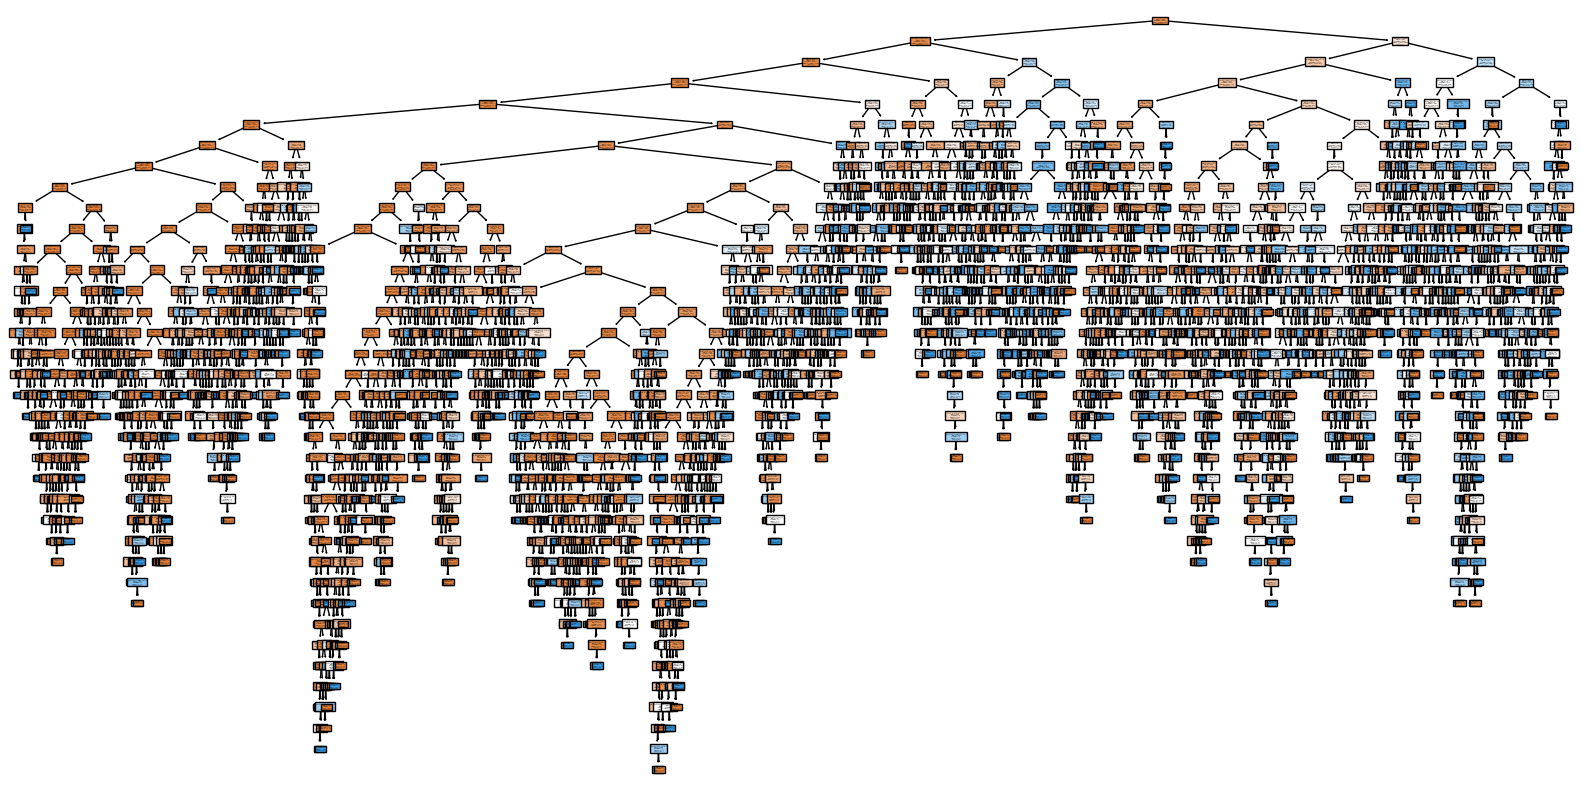

In [12]:
# Confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Plot the Decision Tree
plt.figure(figsize=(20,10))
tree.plot_tree(clf, filled=True, feature_names=X.columns, class_names=['no', 'yes'])
plt.show()